In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
sns.set_theme()

In [38]:
data = pd.read_csv("11_MedicalInsurance_Prediction.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [41]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


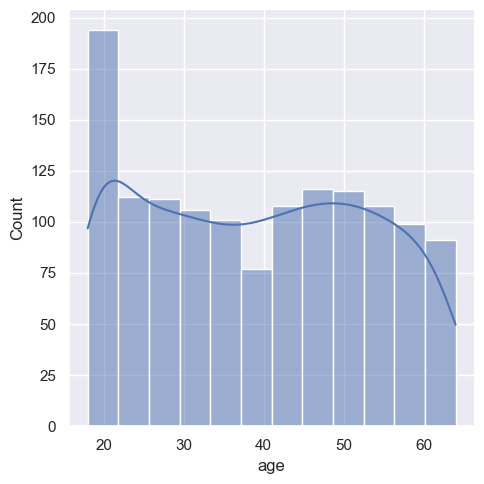

In [42]:
sns.displot(data['age'], kde = True)
plt.show()

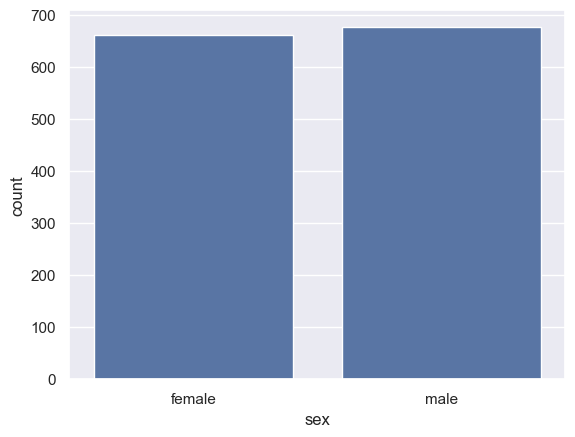

In [43]:
sns.countplot(data = data, x = 'sex')
plt.show()

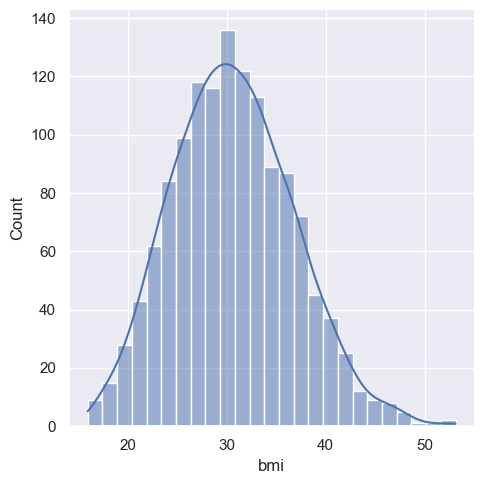

In [44]:
sns.displot(data['bmi'], kde = True)
plt.show()

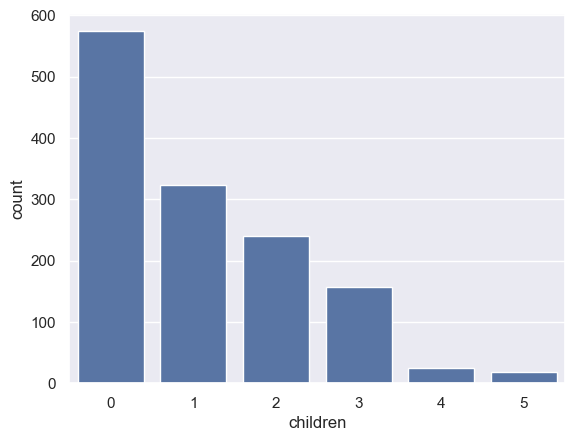

In [45]:
sns.countplot(data = data, x = 'children')
plt.show()

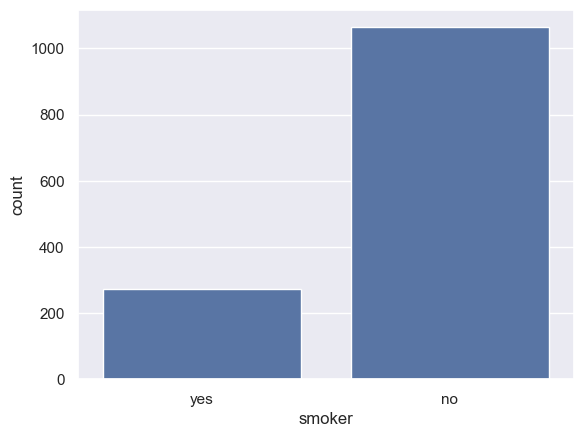

In [46]:
sns.countplot(data = data, x = 'smoker')
plt.show()

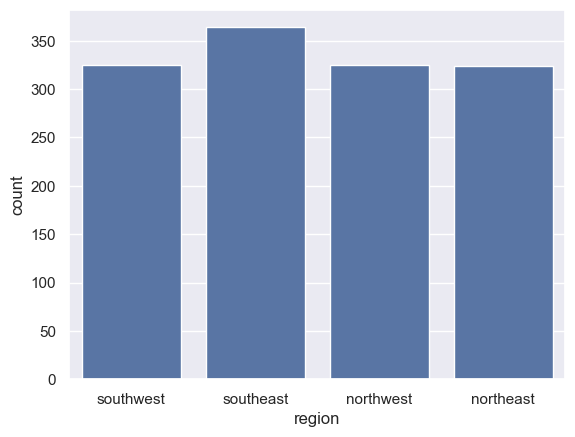

In [47]:
sns.countplot(data = data, x = 'region')
plt.show()

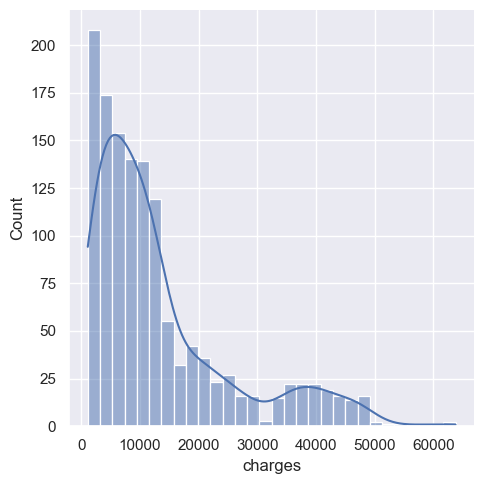

In [48]:
sns.displot(data['charges'], kde = True)
plt.show()

In [49]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [50]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [51]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [52]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [53]:
data.replace({
    "sex" : {"male": 0, "female": 1},
    "smoker" : {"no": 0, "yes": 1},
    "region" : {"southeast" : 0, "southwest" : 1, "northwest" : 2, "northeast" : 3}
}, inplace = True)

C:\Users\Tarun V\AppData\Local\Temp\ipykernel_8708\1172751769.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({


In [54]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [55]:
X = data.iloc[:, :-1].values
Y = data['charges'].values

In [56]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [57]:
#Model
model = LinearRegression()

In [58]:
model.fit(xTrain, yTrain)

LinearRegression()

In [59]:
#Training Evaluation
prediction = model.predict(xTrain)
error = mean_squared_error(yTrain, prediction)
r2 = r2_score(yTrain, prediction)

print(error)
print(r2)

36129281.55018396
0.7518195459072954


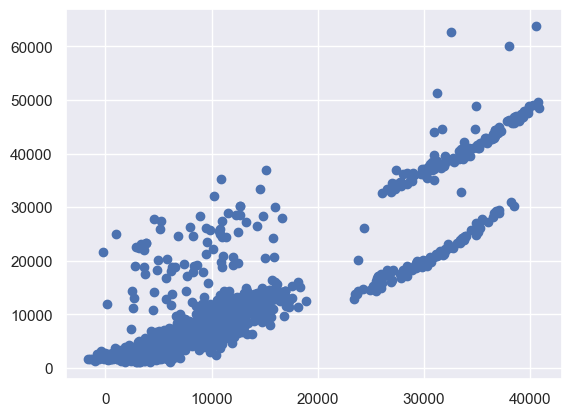

In [60]:
plt.scatter(prediction, yTrain)
plt.show()

In [62]:
#Testing Evaluation
prediction = model.predict(xTest)
error = mean_squared_error(yTest, prediction)
r2 = r2_score(yTest, prediction)

print(error)
print(r2)

38228939.14400928
0.7454471618659976


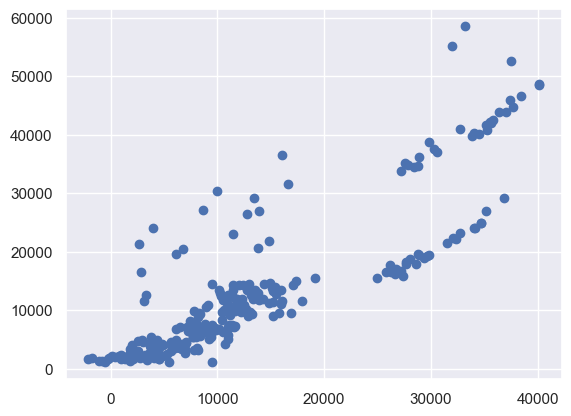

In [64]:
plt.scatter(prediction, yTest)
plt.show()

In [65]:
input = (31,0,36.3,2,1,1)

input = np.asarray(input)
input = input.reshape(1, -1)

prediction = model.predict(input)
print(prediction)

[32515.39979532]
